## Mobile Price Classification 

Opening a new mobile shop without experience can be quite challenging. A major issue will be setting the price of a device. This project will help to classify the price range of a mobile device based on its features. The data was obtained from here

In [1]:
"""
importing necessary libraries 
"""

#Analysis packages
import pandas as pd
import numpy as np

#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""
reading the data
"""

df = pd.read_csv('train.csv')

pd.set_option('display.max.columns', None)


print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 2000
Number of columns: 21


In [3]:
"""
displaying the first 5 rows of the data
"""
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.isnull().sum().sum()

0

**There are no missing values in the data**

In [5]:
"""
viewing some information about the data
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
"""
numerical information about the data
"""
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


* There seems to be varying scales of numbers for some of the columns.


## Exploratory Data Analysis

In [7]:
def feature_corr(series):
    """
    This function computes the correlation between the price range and a specified series in the data 
    params: pandas series
    returns: correlation between price range and series
    rtype: pandas series
    """
    corr = df['price_range'].corr(series)
    if corr < 0:
        corr = df['price_range'].corr (-(series))
    return corr
#applying function on all oclumns in the data
df.apply(feature_corr).sort_values(ascending=False)[1:]

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
dtype: float64

We can see that the feature with the highest correlation with price range is ram <br>  Also the column with the lowest correlation is m_dep


In [8]:
"""
Top columns based on correlation with price range
"""
high_corr_cols = ["ram", "battery_power", "px_height", "int_memory", 
                 "sc_w", "pc", "three_g", "sc_h", "fc", "touch_screen", "mobile_wt", 
                  "talk_time"]

Text(0.5, 1.0, 'Heatmap of top correlated columns')

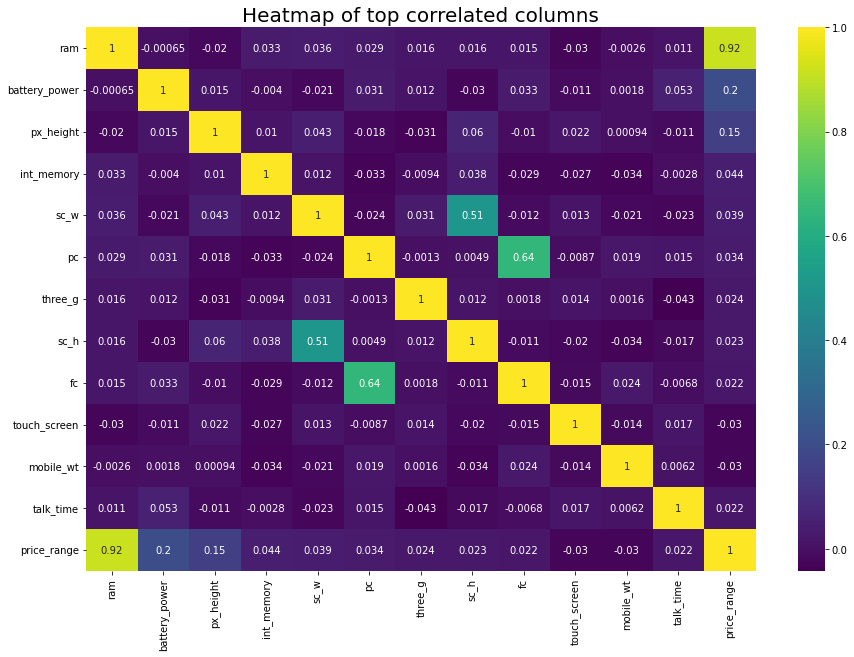

In [9]:
"""
Heatmap of top correlated columns 
"""
corr_list = high_corr_cols.copy()
corr_list.append("price_range")
plt.figure(figsize=(15, 10))
sns.heatmap(df[corr_list].corr(), cmap="viridis", annot=True)
plt.title("Heatmap of top correlated columns", fontsize=20)

<AxesSubplot:>

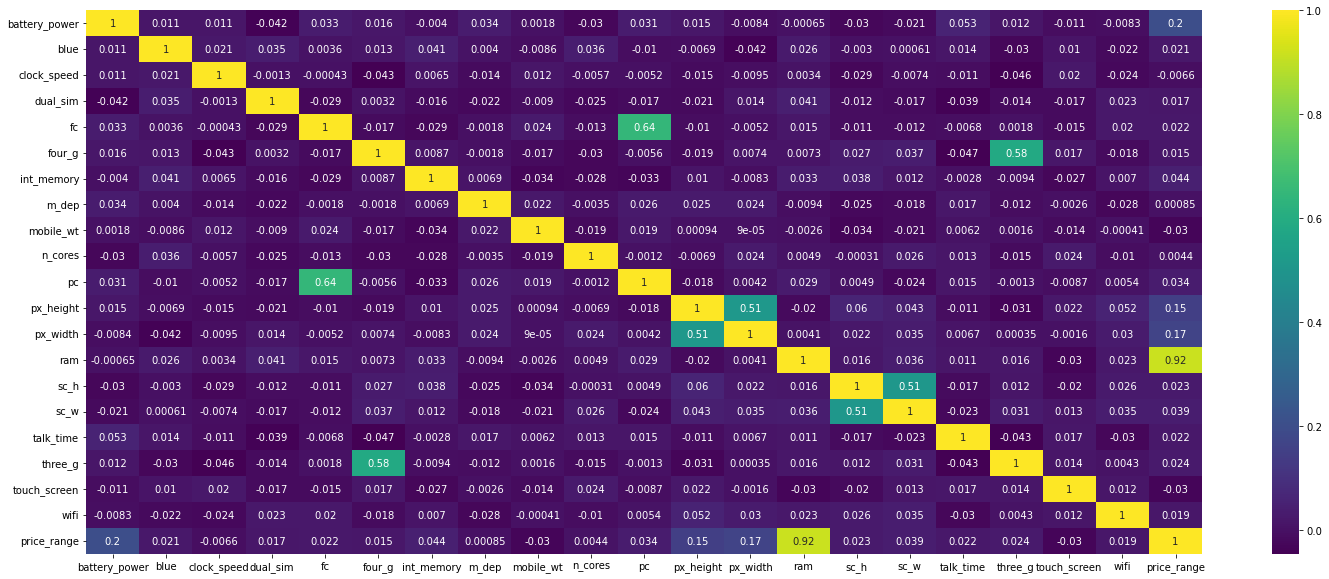

In [10]:
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), cmap="viridis", annot=True)

The columns with the most correlation are:
- price_range and ram 
- pc and fc 
- three_g and four_g 
- px_width and px_height

Text(0.5, 0, 'wifi')

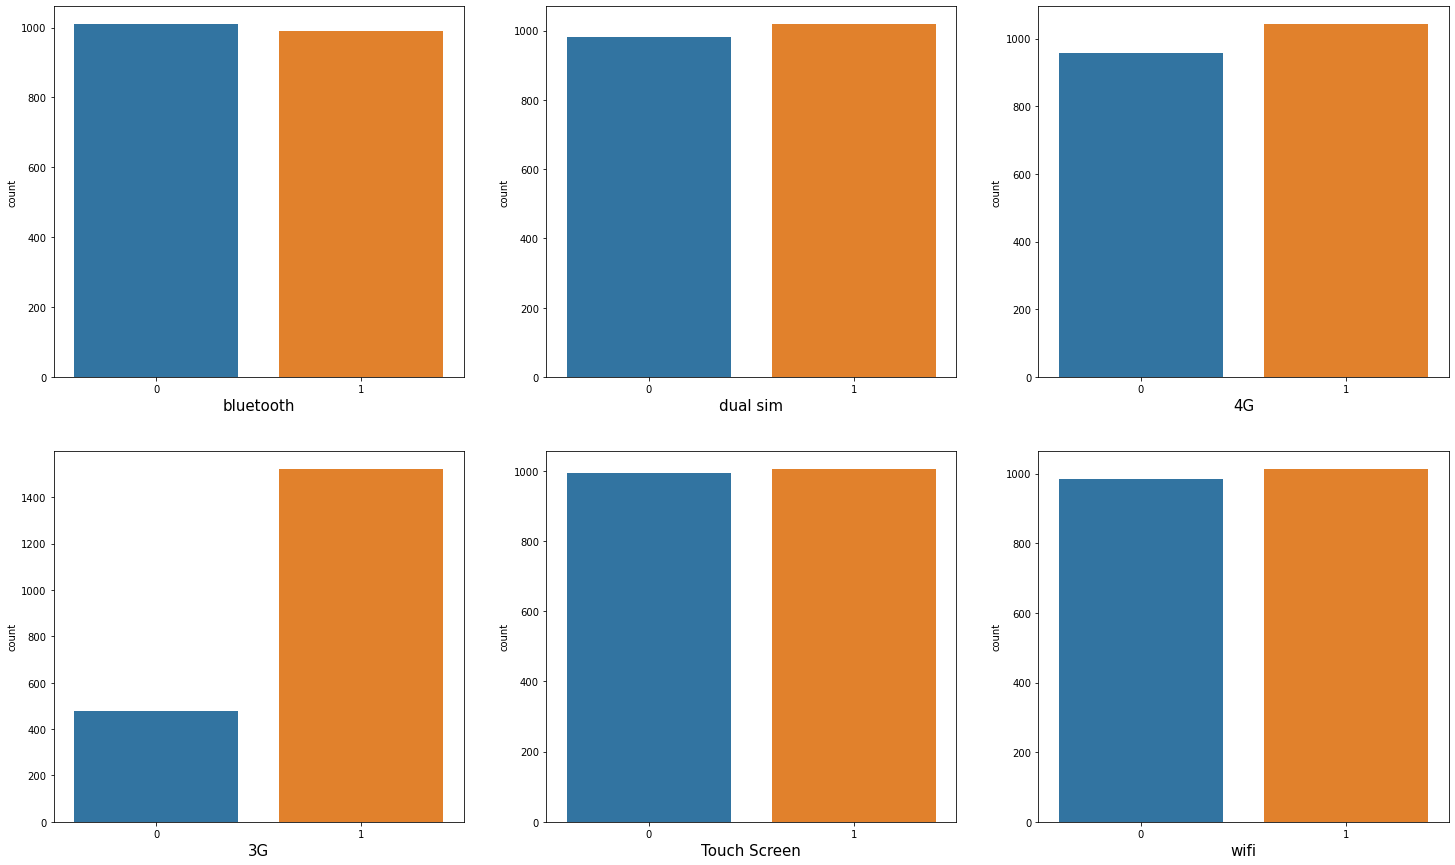

In [11]:
"""
checking distribution of binary columns
"""
plt.figure(figsize=(25,15))   
# plt.suptitle("Distribution of binary columns ")

plt.subplot(2,3,1)
sns.countplot(df.blue)
plt.xlabel('bluetooth', fontsize=15)

plt.subplot(2,3,2)
sns.countplot(df.dual_sim)
plt.xlabel('dual sim', fontsize=15)

plt.subplot(2,3,3)
sns.countplot(df.four_g)
plt.xlabel('4G', fontsize=15)

plt.subplot(2,3,4)
sns.countplot(df.three_g)
plt.xlabel('3G', fontsize=15)

plt.subplot(2,3,5)
sns.countplot(df.touch_screen)
plt.xlabel('Touch Screen', fontsize=15)
plt.subplot(2,3,6)
sns.countplot(df.wifi)
plt.xlabel('wifi', fontsize=15)

We can see that the binary columns are almost evenly distributed in all cases, except for three_g <br>
This makes sense as no one really uses phones without 3g anymore.


Text(0.5, 0, 'dual sim')

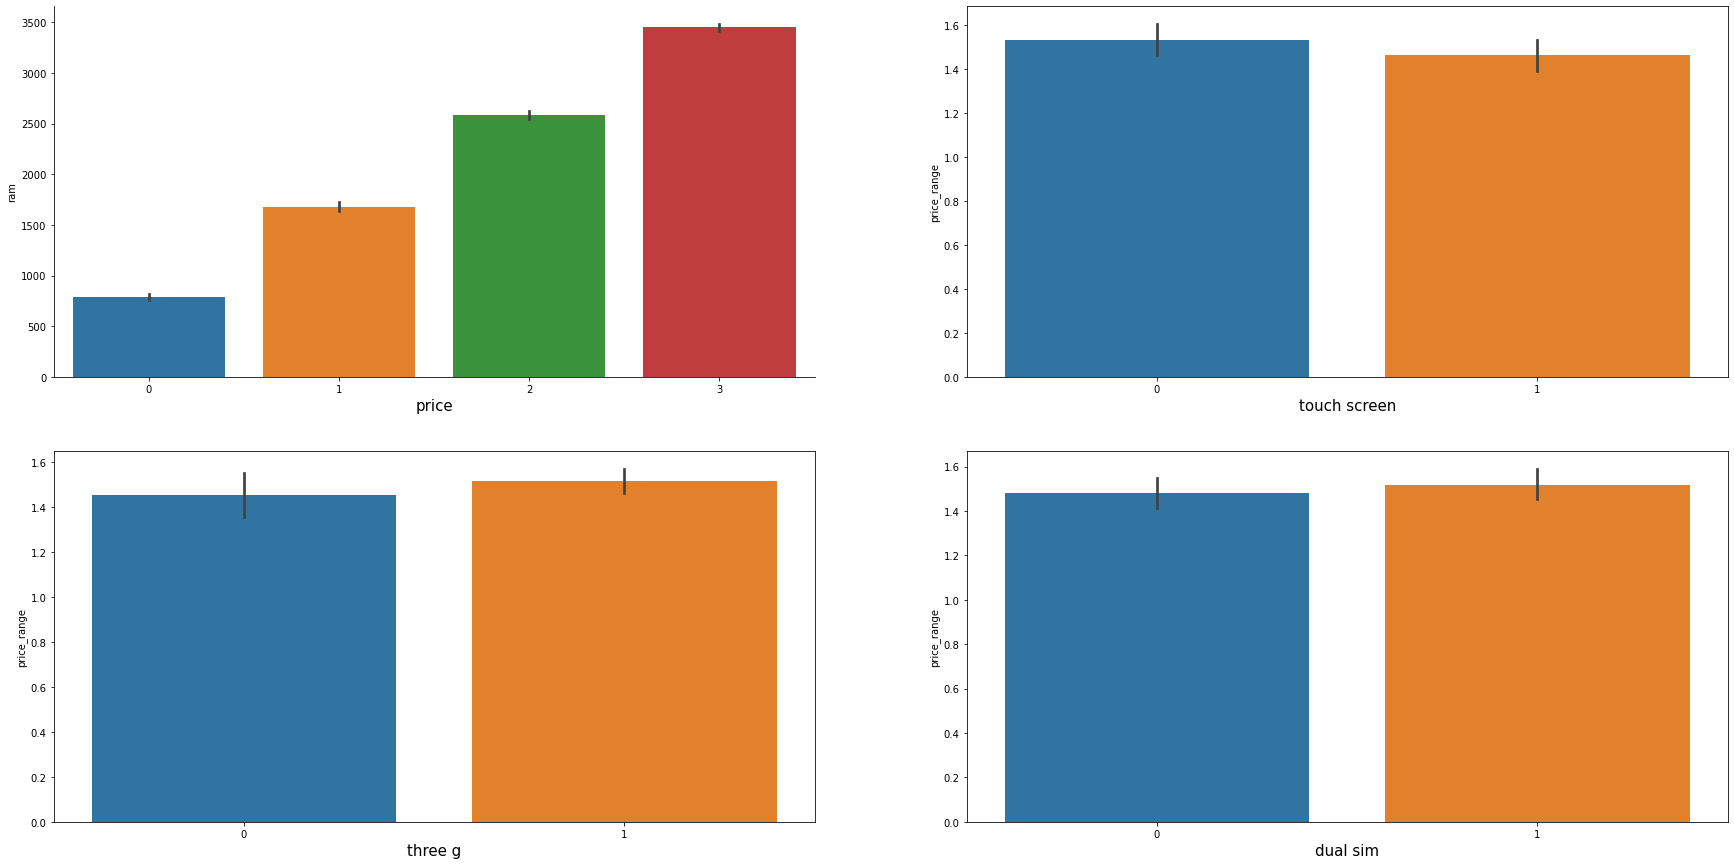

In [12]:
plt.figure(figsize=(30,15))  

plt.subplot(2,2,1)
sns.barplot(x=df.price_range, y=df.ram)
sns.despine()
plt.xlabel("price", fontsize=15)

plt.subplot(2,2,2)
sns.barplot(y=df.price_range, x=df.touch_screen)
plt.xlabel("touch screen", fontsize=15)

plt.subplot(2,2,3)
sns.barplot(y=df.price_range, x=df.three_g)
plt.xlabel("three g", fontsize=15)

plt.subplot(2,2,4)
sns.barplot(y=df.price_range, x=df.dual_sim)
plt.xlabel("dual sim", fontsize=15)

The higher the price_range, the more the number of devices. <br> The highest price range is 3 and it has the highest number of devices 
<br> This means customers are more likely to go for high end products regardless of how much price increases

## Data Preparation

In [13]:
"""
Splitting the data 
"""
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_full_train = df_full_train.price_range.values
y_train = df_train.price_range.values
y_val = df_val.price_range.values
y_test = df_test.price_range.values

del df_full_train['price_range']
del df_train['price_range']
del df_val['price_range']
del df_test['price_range']

In [14]:
"""
Checking the size of each data split
"""
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(1200, 20)
(400, 20)
(400, 20)


## Model Building and Paramter Tuning 

First we build the models with default parameters and them we tune the parameters and find the best ones

Also, we set our random state to avoid inconsistencies with model performance 

In [15]:
"""
Setting random_state
"""
r = 1

In [16]:
"""
Creating a dictionary to store each model performance 
"""

models = {}

### Logistic Regression

First we build the model without feature scaling, and then with scaling. <br> 
Then we compare the results 

In [17]:
"""
Logistic Regression without scaling
"""
X_train = df_train.values
lr = LogisticRegression(random_state=r)
lr.fit(X_train, y_train)

X_val = df_val.values
y_pred = lr.predict(X_val)

accuracy_score(y_val, y_pred)

0.62

In [18]:
"""
Logistic Regression with standard scaler
"""
sc = StandardScaler()

X_train = sc.fit_transform(df_train)
lr = LogisticRegression(random_state=r)
lr.fit(X_train, y_train)

X_val = sc.fit_transform(df_val)
y_pred = lr.predict(X_val)

accuracy_score(y_val, y_pred)

0.905

We can see that with feature scaling, The difference in accuracy is very significant 

### Tuning Logistic Regression

Here we try to find the best regularization value for our model

In [19]:
scores_dict = {}
for c in [1, 5, 7, 10, 15, 30, 50, 100]:
    
    sc = StandardScaler()

    X_train = sc.fit_transform(df_train)
    lr = LogisticRegression(C=c, random_state=r)
    lr.fit(X_train, y_train)

    X_val = sc.fit_transform(df_val)
    y_pred = lr.predict(X_val)

    score = np.round(accuracy_score(y_val, y_pred), 3)
    scores_dict[c] = score 
scores_dict

{1: 0.905,
 5: 0.912,
 7: 0.915,
 10: 0.918,
 15: 0.918,
 30: 0.91,
 50: 0.91,
 100: 0.91}

We can see that tuning our model does not lead to significant change in accuracy, <br> Therefore we use the original parameters for the final model

In [20]:
"""
Final Logistic Regression Model
"""
sc = StandardScaler()

X_train = sc.fit_transform(df_train)
lr = LogisticRegression(random_state=r)
lr.fit(X_train, y_train)

X_val = sc.fit_transform(df_val)
y_pred = lr.predict(X_val)

lr_score = accuracy_score(y_val, y_pred)

print(lr_score)

models['Logistic Regression'] = lr_score

0.905


## Decision Trees

We use decison trees with default parameters then with tuning. <br> 
parameters to be tuned:
- max_depth 
- min_samples_leaf

In [21]:
"""
with default parameters
"""
dt = DecisionTreeClassifier(random_state=r)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

accuracy_score(y_val, y_pred_dt)

0.81

#### Tuning max_depth parameter 

In [22]:
for m in [1,3, 5, 10, 20, None]:
    dt = DecisionTreeClassifier(max_depth=m, random_state=r)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_val)

    score = accuracy_score(y_val, y_pred_dt)
    print(f"{m} -> {score}")

1 -> 0.5175
3 -> 0.78
5 -> 0.8375
10 -> 0.8025
20 -> 0.81
None -> 0.81


In [23]:
for m in [5, 6, 7]:
    dt = DecisionTreeClassifier(max_depth=m, random_state=r)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_val)

    score = accuracy_score(y_val, y_pred_dt)
    print(f"{m} -> {score}")

5 -> 0.8375
6 -> 0.825
7 -> 0.8025


We can see that the best max_depth is 5

#### Tuning min_samples_leaf parameter

Now that we have the best max_depth, let's find the best min_samples_leaf

In [24]:
for l in [1, 3, 5, 10, 20]:
    dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=l, random_state=r)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_val)

    score = accuracy_score(y_val, y_pred_dt)
    print(f"{l} -> {score}")    

1 -> 0.8375
3 -> 0.85
5 -> 0.85
10 -> 0.86
20 -> 0.84


The best min_samples_leaf is 10 for max_depth 5

Now we try different combinations of max_depth nd min_samples_leaf

In [25]:
for m in [4, 5, 6]:
    print(m)
    for l in [1, 3, 5, 10, 20]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=l)
        dt.fit(X_train, y_train)
        y_pred_dt = dt.predict(X_val)

        score = accuracy_score(y_val, y_pred_dt)
        print(f"{l} -> {score}")  
    print()

4
1 -> 0.79
3 -> 0.79
5 -> 0.7875
10 -> 0.7875
20 -> 0.7775

5
1 -> 0.8325
3 -> 0.85
5 -> 0.85
10 -> 0.86
20 -> 0.84

6
1 -> 0.8275
3 -> 0.84
5 -> 0.8425
10 -> 0.85
20 -> 0.84



Our best values still turn out to be max_depth=5 and min_samples_leaf=10

In [26]:
"""
Training final Model
"""
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

dt_score = accuracy_score(y_val, y_pred_dt)
print(dt_score)

models['Decision Trees'] = dt_score

0.86


#### Feature Importance 

We can check the features that were most important for our decision tree classifier

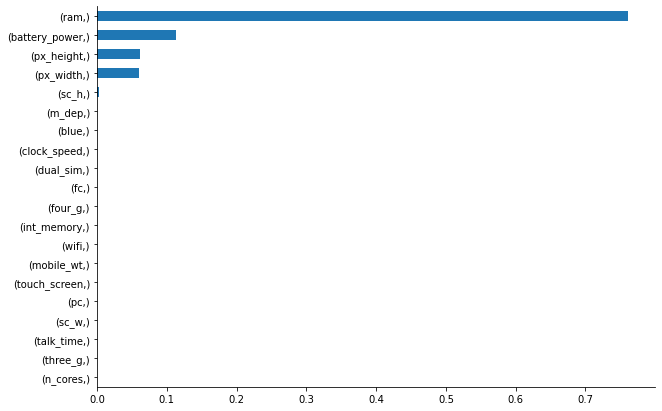

In [27]:
plt.figure(figsize=(10,7))
dt_imp = pd.Series(dt.feature_importances_, index=[df_train.columns]).sort_values(ascending=True)
dt_imp.plot(kind='barh')
sns.despine()

The chart shows that 4 features were very significant in building our decision and the ram is the most important feature 

## Random Forest 

We are going to tune random forest the same way we tuned decison trees. <br>
But first, let's see what the default classifier gives us:

In [28]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

accuracy_score(y_val, y_pred_rf)

0.8575

#### Tuning n_estimators

Here we are checking how accuracy varies depending on the number of trees 

In [29]:
accs = []
for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=1)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_val)

    score = accuracy_score(y_val, y_pred_rf)
    accs.append(score)
    print(i, score)

10 0.7875
20 0.8125
30 0.835
40 0.845
50 0.8625
60 0.865
70 0.87
80 0.8575
90 0.87
100 0.8575
110 0.8475
120 0.855
130 0.8625
140 0.865
150 0.8575
160 0.8625
170 0.87
180 0.8625
190 0.865
200 0.865


We can see that after 70 trees accuracy never increases. <br>

### Tuning max_depth

Now let's check which combination of max_depth and number of trees gives us maximum accuracy 

In [30]:
"""
tqdm helps us to track the progress of our iterations 
"""
from tqdm.auto import tqdm

In [31]:
"""
Checking different combinations of max_depth and n_estimators
"""
rf_dict_m = {}
for d in tqdm([1, 3, 5, 10, 20]):
    aucs = []
    
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_val)

        score = accuracy_score(y_val, y_pred_rf)
        aucs.append(score)
    rf_dict_m[d] = aucs

  0%|          | 0/5 [00:00<?, ?it/s]

We check how each combination performs by plotting them

(0.85, 0.9)

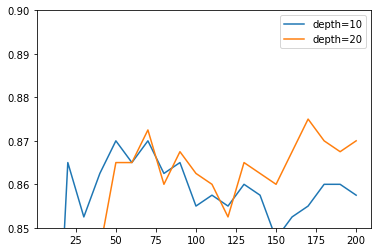

In [32]:
# plt.plot(list(range(10, 201, 10)), rf_dict_m[1], label='depth=1', color='black')
# plt.plot(list(range(10, 201, 10)), rf_dict_m[3], label='depth=3',  color='blue')
# plt.plot(list(range(10, 201, 10)), rf_dict_m[5], label='depth=5', color='red')
plt.plot(list(range(10, 201, 10)), rf_dict_m[10], label='depth=10')
plt.plot(list(range(10, 201, 10)), rf_dict_m[20], label='depth=20')
plt.legend()
plt.ylim(0.85, 0.90)

From the plots we can see that the best combination is max_depth=20 and n_estimators = 175 <br> 
It is worthy to note that the higher the parameters the more complex th model becomes. <br>
Therefore, as the increase is small, the n_estimator selected here is 65

In [33]:
"""
Evaluating our classifier using selected parameters 
"""
rf = RandomForestClassifier(n_estimators=65, max_depth=20, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

score = accuracy_score(y_val, y_pred_rf)
score

0.8725

### Tuning min_samples_leaf parameter 

Now let's find the most effective min_samples_leaf by trying different values with different number of trees

In [34]:
rf_dict_s = {}
for s in tqdm([1, 3, 5, 10, 20]):
    aucs = []
    
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=20, min_samples_leaf=s, random_state=1)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_val)

        score = accuracy_score(y_val, y_pred_rf)
        aucs.append(score)
    rf_dict_s[s] = aucs

  0%|          | 0/5 [00:00<?, ?it/s]

We check how each combination performs by plotting it

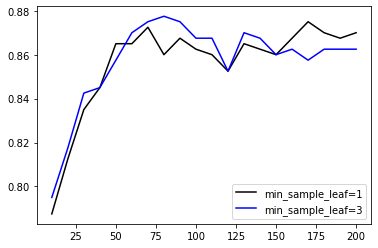

In [35]:
plt.plot(list(range(10, 201, 10)), rf_dict_s[1], label='min_sample_leaf=1', color='black')
plt.plot(list(range(10, 201, 10)), rf_dict_s[3], label='min_sample_leaf=3', color='blue')
# plt.plot(list(range(10, 201, 10)), rf_dict_s[5], label='min_sample_leaf=5', color='red')
# plt.plot(list(range(10, 201, 10)), rf_dict_s[10], label='min_sample_leaf=10')
# plt.plot(list(range(10, 201, 10)), rf_dict_s[20], label='min_sample_leaf=20')
plt.legend()

We see that although min_samples_leaf 1 and 3 seem to have the same peak. <br> 
however min_samples_leaf reaches the peak in fewer number of trees and so we select it

In [36]:
"""
Training the final model with best parameters after tuning
"""
rf = RandomForestClassifier(n_estimators=65, max_depth=20, min_samples_leaf=3, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

rf_score = accuracy_score(y_val, y_pred_rf)

print(score)

models["Random Forest"] = rf_score

0.845


We can also check feature importance for our random forest model

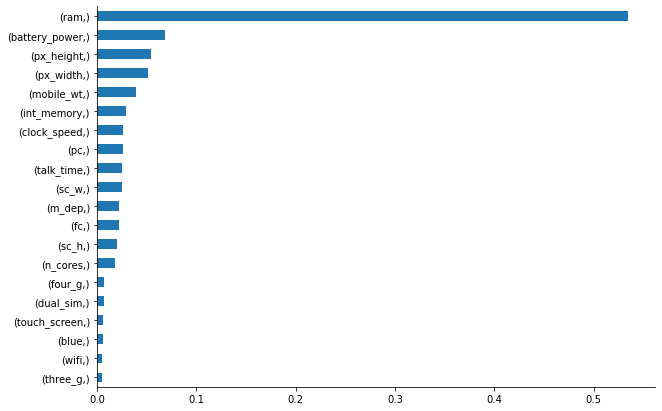

In [37]:
plt.figure(figsize=(10,7))
dt_imp = pd.Series(rf.feature_importances_, index=[df_train.columns]).sort_values(ascending=True)
dt_imp.plot(kind='barh')
sns.despine()

We see that at the top level, the feature importance for our Decison Trees and RF are similar, <br>
but begin to change as importance levels decrease

## Selecting the best model 

In [38]:
scores_df = pd.DataFrame(models.items(), columns=['Model', 'Score'])
scores_df

,Model,Score
0,Logistic Regression,0.905
1,Decision Trees,0.860
2,Random Forest,0.870


After comparing the models we can see that the Logistic Regression model performs best. <br>

Let's train our final model.

We first create functions for training and testing 

In [39]:
def train(df, y):
    """
    This function takes in a set of features and targets, 
    and fits them on a logistic regression model
    params: features, target
    returns: standard scaler, model objects
    rtype: object
    """
    sc = StandardScaler()
    X = sc.fit_transform(df)

    model = LogisticRegression(random_state=1)
    model.fit(X, y)
    
    return sc, model

def predict(df, sc, model):
    """
    This function predicts a target class for a set of features
    params: features, standard scaler and model objects
    returns: target class
    rtype: integer
    """
    X = sc.transform(df)
    y_pred = model.predict(X)

    return y_pred

In [40]:
"""
Evaluating model on test data 
"""
sc, model = train(df_full_train, y_full_train)

y_pred = predict(df_test, sc, model)

accuracy_score(y_test, y_pred)

0.96

## Saving the model

In [41]:
output_file = "pred_file.bin"

In [42]:
with open(output_file, 'wb') as out_file:
    pickle.dump((sc, model), out_file)